In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from collections import Counter

In [2]:
df = pd.read_csv("/content/sample_data/task2.zip", encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# Drop unnecessary columns from the DataFrame
column_to_remove = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(column_to_remove, axis=1)

In [9]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#FF00CC")]}
])
styled_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.shape

(5572, 2)

In [8]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

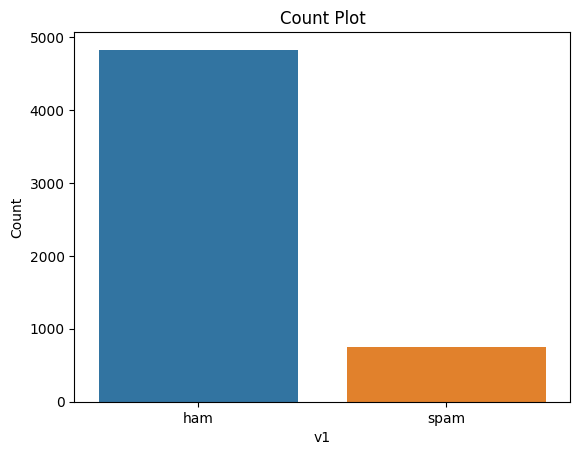

In [11]:
sns.countplot(data=df, x='v1')
plt.xlabel('v1')
plt.ylabel('Count')
plt.title('Count Plot')
plt.show()

In [12]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")

df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] = 1

In [13]:
# Separate the feature (v2) and target (category) data
X=df['v2']
y=df['Category']

In [15]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [17]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: Category, Length: 5572, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
#Create a TF-IDF vectorizer to convert text messages into numerical feature
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

In [25]:
# Convert the training and testing text messages into numerical features using TF-IDF
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

In [26]:
# Convert the target values to integers (0 and 1)
y_train=y_train.astype("int")
y_test=y_test.astype("int")

In [22]:
X_train

3890    No problem. We will be spending a lot of quali...
5553                          Hahaha..use your brain dear
4366    I like dis sweater fr mango but no more my siz...
3968    Thanks for your message. I really appreciate y...
3771                Does uncle timi help in clearing cars
                              ...                        
3335                         Then u go back urself lor...
1099    Been up to ne thing interesting. Did you have ...
2514        Ok ill send you with in  &lt;DECIMAL&gt;  ok.
3606                         I have no idea where you are
2575                 Now thats going to ruin your thesis!
Name: v2, Length: 4457, dtype: object

In [27]:
print(X_train_features)

  (0, 6566)	0.29071829686789585
  (0, 5260)	0.5087678982336444
  (0, 4010)	0.4050685955975014
  (0, 6073)	0.5665799184805557
  (0, 5169)	0.4141795823412651
  (1, 2116)	0.3523355719340784
  (1, 1423)	0.5940444343697558
  (1, 6859)	0.4124100686677272
  (1, 3141)	0.5940444343697558
  (2, 3565)	0.40508027557608417
  (2, 5897)	0.440107047813195
  (2, 4140)	0.440107047813195
  (2, 2845)	0.3382880530026162
  (2, 6332)	0.440107047813195
  (2, 2258)	0.3104925886287087
  (2, 3910)	0.20972094634778068
  (3, 2105)	0.17893490557083572
  (3, 7191)	0.2812743655569581
  (3, 1763)	0.2431679156261037
  (3, 6620)	0.2114722422733664
  (3, 6461)	0.2757210982911898
  (3, 7045)	0.20776132213481782
  (3, 4865)	0.26062868324883703
  (3, 2251)	0.2952674814882996
  (3, 5175)	0.3101007821209402
  :	:
  (4451, 4355)	0.5653315538937795
  (4452, 6856)	0.8442476281269602
  (4452, 4003)	0.5359533024452802
  (4453, 7234)	0.3927126429320925
  (4453, 4634)	0.3513960490954625
  (4453, 4498)	0.36145784624804855
  (4453, 35

In [29]:
# Create a logistic regression model and train it on the training data
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [31]:
# Make predictions on the training data
predict_train_data=model.predict(X_train_features)

In [32]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.971729863136639


In [33]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_features)

In [34]:
#Model Evaluation
accuracy_test_data=accuracy_score(y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9560538116591928


In [35]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


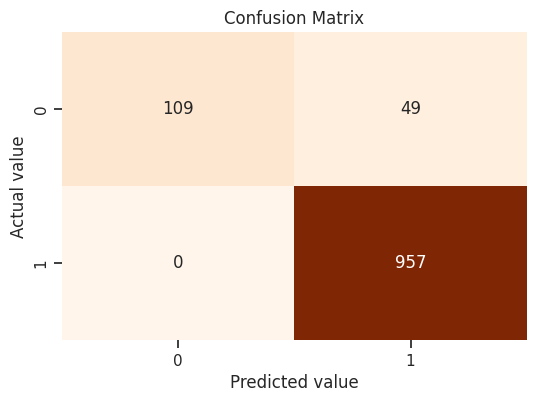

In [36]:
conf_matrix=confusion_matrix(y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()